In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sys
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
tf.set_random_seed(1)

In [3]:
learning_rate = 0.05
epoch = 1000
batch_size = 128

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

epoch : 100 loss = 0.8979794
accuracy: 0.8463


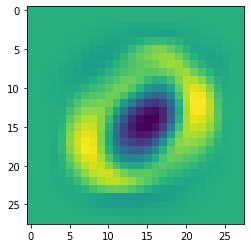

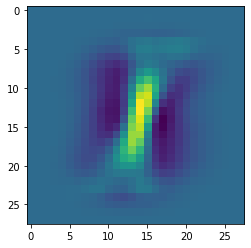

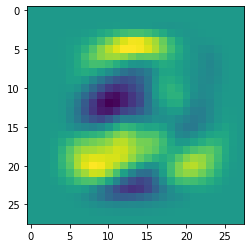

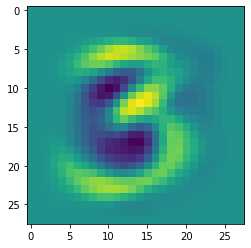

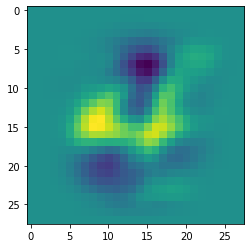

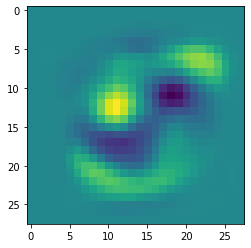

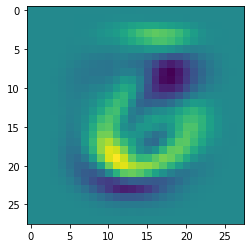

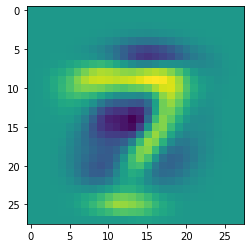

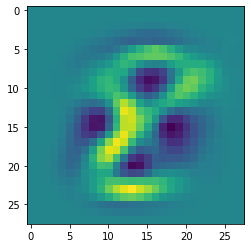

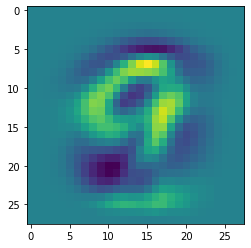

epoch : 200 loss = 0.6216606
accuracy: 0.8735


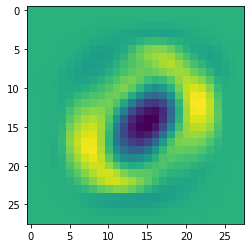

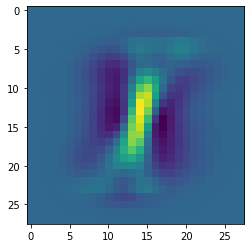

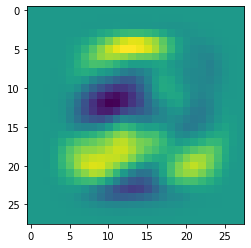

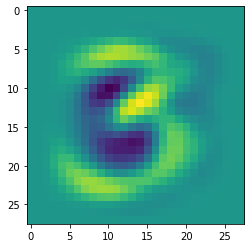

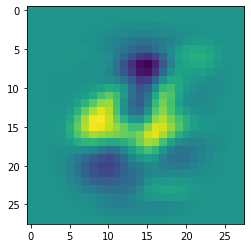

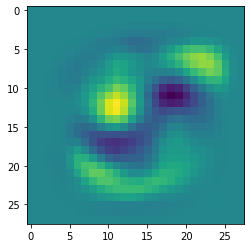

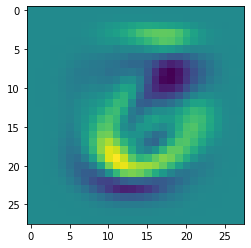

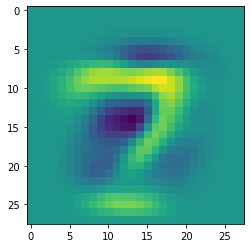

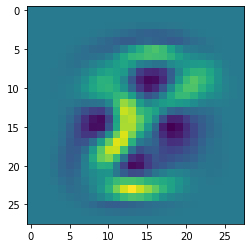

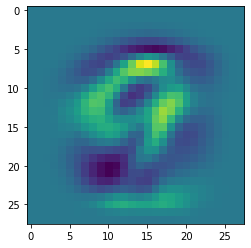

epoch : 300 loss = 0.4887307
accuracy: 0.8808


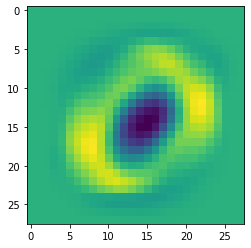

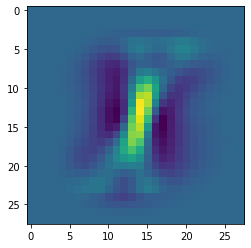

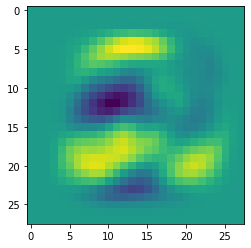

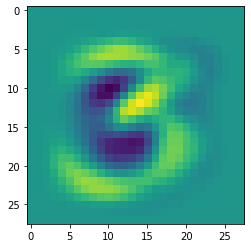

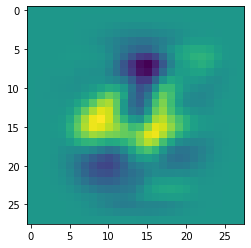

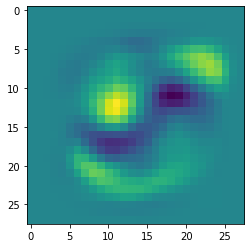

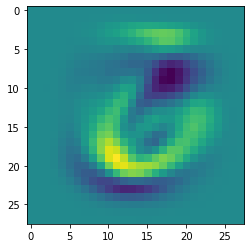

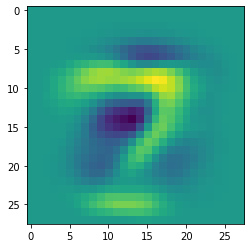

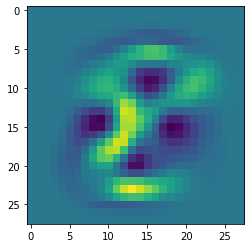

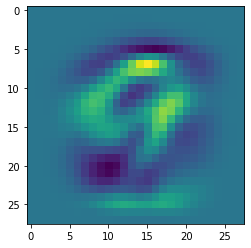

epoch : 400 loss = 0.520085
accuracy: 0.8865


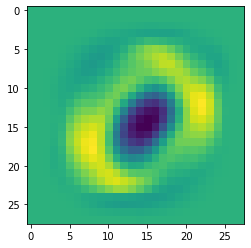

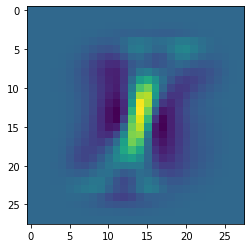

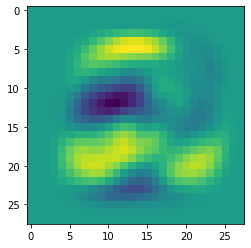

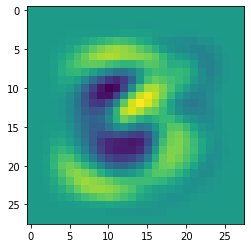

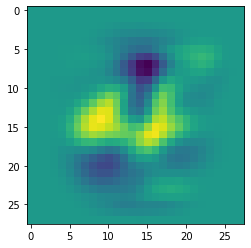

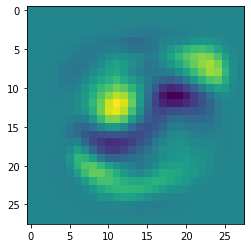

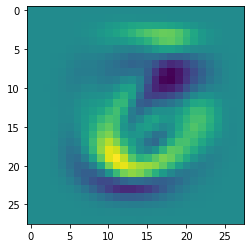

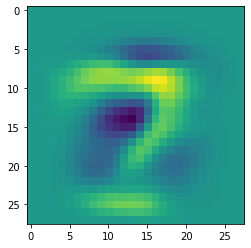

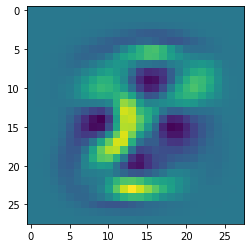

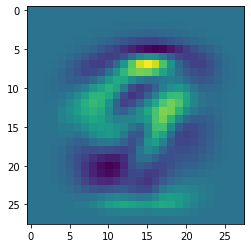

epoch : 500 loss = 0.47507983
accuracy: 0.8893


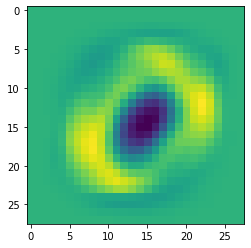

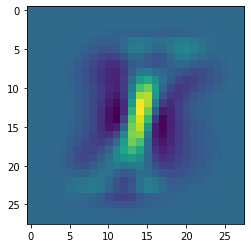

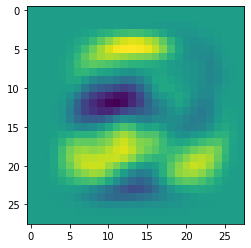

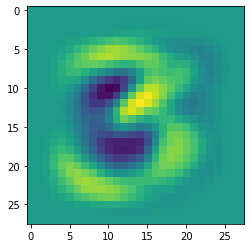

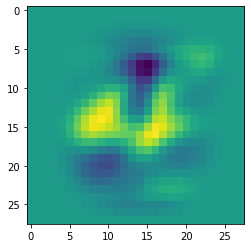

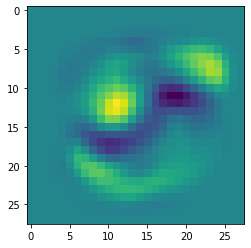

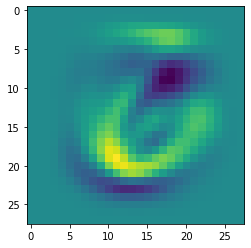

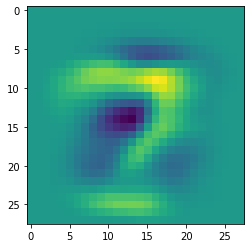

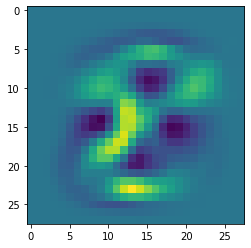

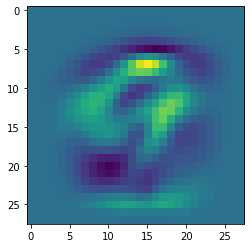

epoch : 600 loss = 0.42949986
accuracy: 0.8938


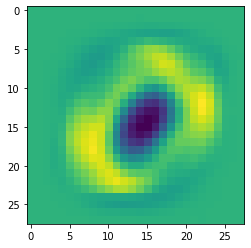

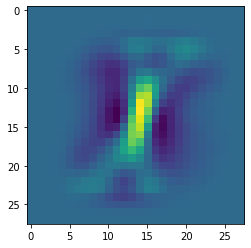

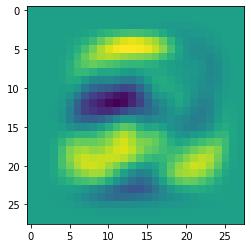

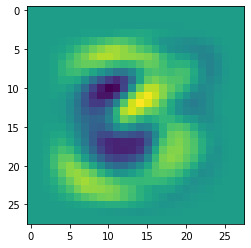

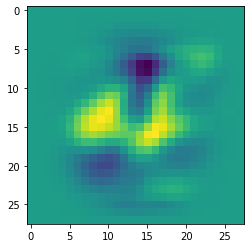

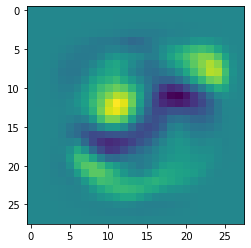

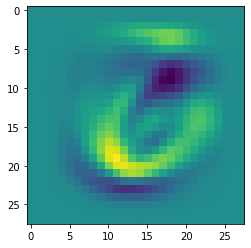

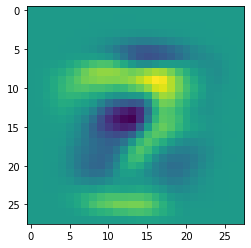

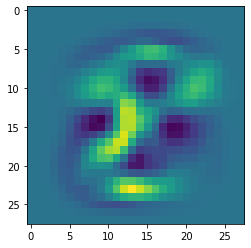

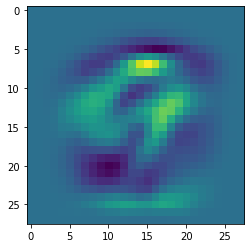

epoch : 700 loss = 0.37467176
accuracy: 0.8964


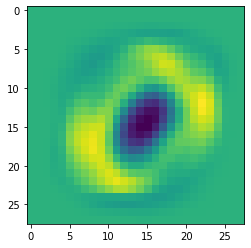

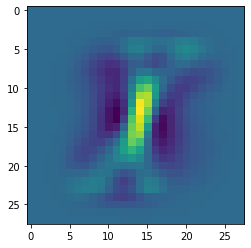

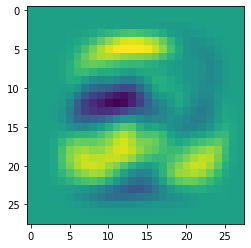

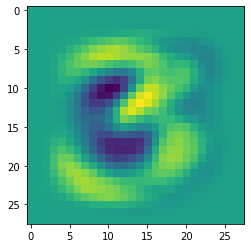

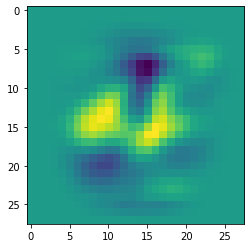

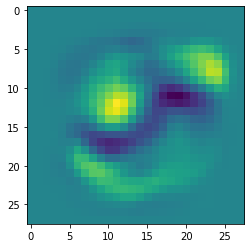

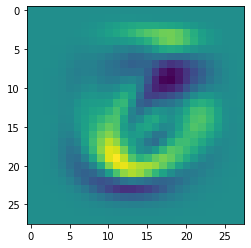

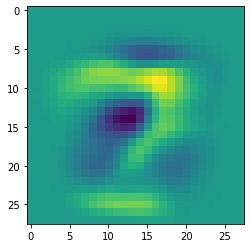

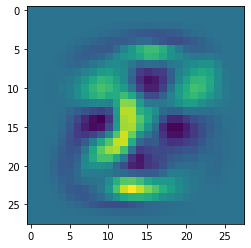

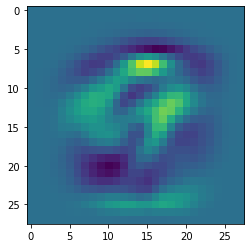

epoch : 800 loss = 0.37086058
accuracy: 0.897


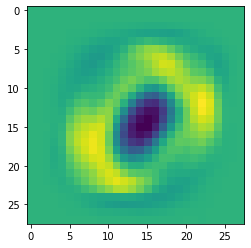

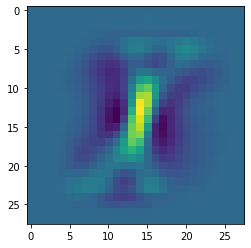

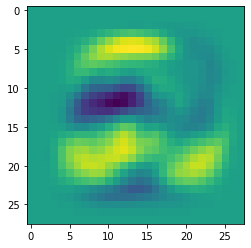

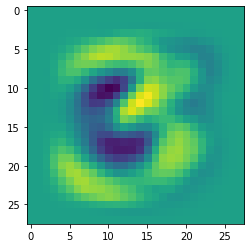

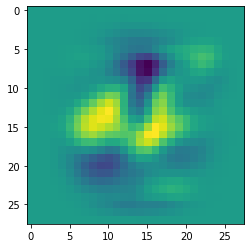

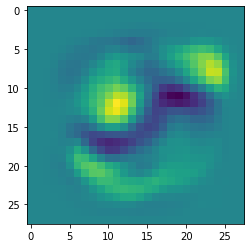

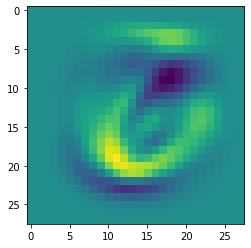

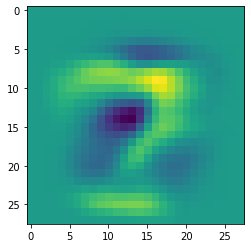

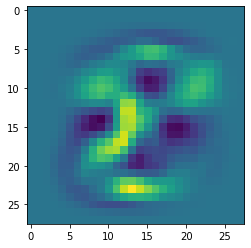

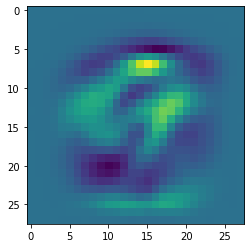

epoch : 900 loss = 0.54094195
accuracy: 0.8998


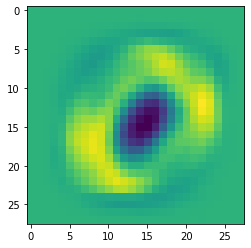

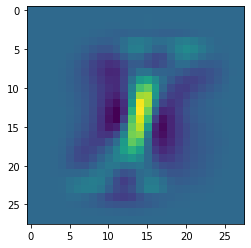

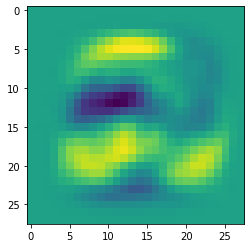

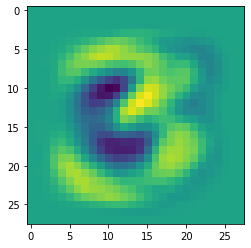

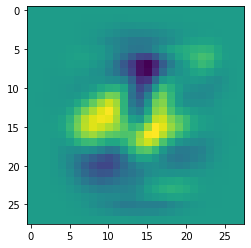

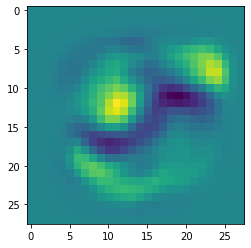

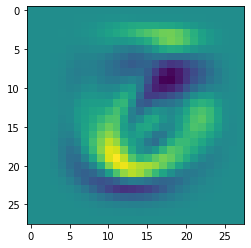

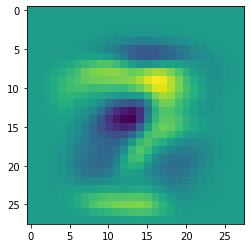

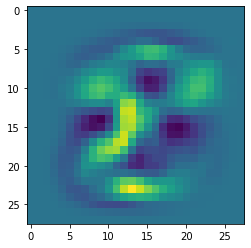

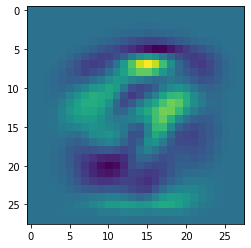

epoch : 1000 loss = 0.37555593
accuracy: 0.9013


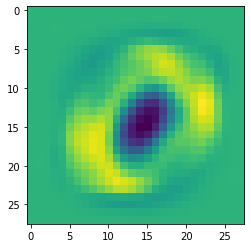

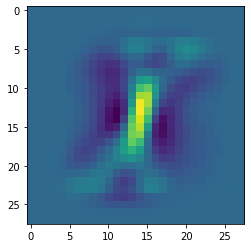

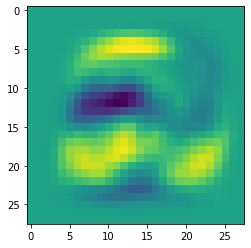

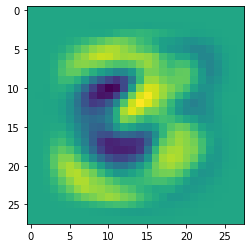

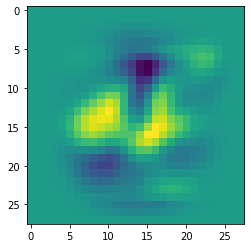

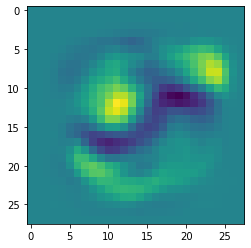

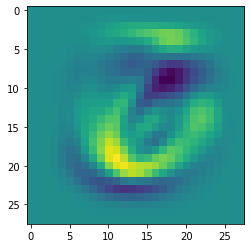

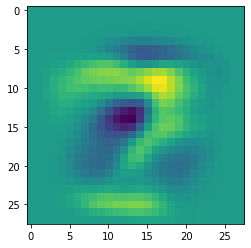

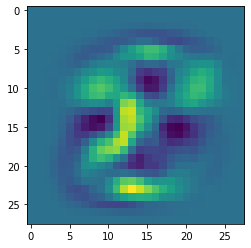

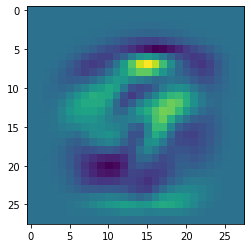

In [5]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if((e+1)%100==0 and e!=0):  
        print ("epoch :",str(e+1),'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        for i in range(10):  # 繪製10個隱層神經元與輸入層神經元個之間的權重
            im=W_val[:,i].reshape(28,28)  #把矩陣的每一列 變化層 28*28 的矩陣
            plt.imshow(im) 
            plt.show()

In [6]:
#隨機初始權值W與偏置項b
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if((e+1)%100==0 and e!=0):  
        print ("epoch :",str(e+1),'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

epoch : 100 loss = 4.4920554
accuracy: 0.3128
epoch : 200 loss = 3.5214338
accuracy: 0.4526
epoch : 300 loss = 2.8787124
accuracy: 0.5425
epoch : 400 loss = 2.2399096
accuracy: 0.603
epoch : 500 loss = 2.0029964
accuracy: 0.645
epoch : 600 loss = 1.5246297
accuracy: 0.673
epoch : 700 loss = 1.5711669
accuracy: 0.695
epoch : 800 loss = 1.5393198
accuracy: 0.7119
epoch : 900 loss = 1.5596402
accuracy: 0.7318
epoch : 1000 loss = 1.1890237
accuracy: 0.7451


In [8]:
#隨機初始權值W與偏置項b
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.random_uniform([784,10]))
b = tf.Variable(tf.random_uniform([10]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if((e+1)%100==0 and e!=0):  
        print ("epoch :",str(e+1),'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

epoch : 100 loss = 1.2305285
accuracy: 0.5892
epoch : 200 loss = 0.6745263
accuracy: 0.7392
epoch : 300 loss = 0.7671528
accuracy: 0.7928
epoch : 400 loss = 0.55148065
accuracy: 0.8183
epoch : 500 loss = 0.4629732
accuracy: 0.8331
epoch : 600 loss = 0.47578356
accuracy: 0.8475
epoch : 700 loss = 0.55703974
accuracy: 0.8535
epoch : 800 loss = 0.41730562
accuracy: 0.8607
epoch : 900 loss = 0.62676305
accuracy: 0.8646
epoch : 1000 loss = 0.5754697
accuracy: 0.8688


In [11]:
x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]))                                               #初始化權值W
b = tf.Variable(tf.zeros([10]))                                                    #初始化偏置項b
layer1=tf.nn.leaky_relu(tf.matmul(x,W) + b)
y = tf.nn.softmax(layer1)                                                          #加權變換並進行softmax迴歸，得到預測概率
regularizer=tf.contrib.layers.l2_regularizer(0.05) 
regloss=regularizer(W)
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=1))   #損失函式為交叉熵
totalloss=cross_entropy+regloss

In [12]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(totalloss)   
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))             #在測試階段，測試準確度計算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))         #多個批次的準確度均值

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if((e+1)%100==0 and e!=0):  
        print ("epoch :",str(e+1),'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

epoch : 100 loss = 0.9691593
accuracy: 0.8449
epoch : 200 loss = 0.62126124
accuracy: 0.8621
epoch : 300 loss = 0.7139276
accuracy: 0.8712
epoch : 400 loss = 0.7745633
accuracy: 0.8723
epoch : 500 loss = 0.5978504
accuracy: 0.8784
epoch : 600 loss = 0.6058335
accuracy: 0.8796
epoch : 700 loss = 0.6368946
accuracy: 0.8823
epoch : 800 loss = 0.61484563
accuracy: 0.8835
epoch : 900 loss = 0.53862745
accuracy: 0.8861
epoch : 1000 loss = 0.5655672
accuracy: 0.8847


In [13]:
x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]))                                               #初始化權值W
b = tf.Variable(tf.zeros([10]))                                                    #初始化偏置項b
layer1=tf.nn.elu(tf.matmul(x,W) + b)
y = tf.nn.softmax(layer1)                                                          #加權變換並進行softmax迴歸，得到預測概率
regularizer=tf.contrib.layers.l2_regularizer(0.05) 
regloss=regularizer(W)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_,y))
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=1))   #損失函式為交叉熵
totalloss=cross_entropy+regloss

In [14]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(totalloss)   
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))             #在測試階段，測試準確度計算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))         #多個批次的準確度均值

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.global_variables_initializer().run(session=sess)

for e in range(epoch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, loss_val, W_val = sess.run([train_step, cross_entropy, W], feed_dict={x: batch_xs, y_: batch_ys})
    if((e+1)%100==0 and e!=0):    
        print ("epoch :",str(e+1),'loss = %s' % loss_val)
        print("accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

epoch : 100 loss = 2.22292
accuracy: 0.5044
epoch : 200 loss = 2.065434
accuracy: 0.5439
epoch : 300 loss = 2.0306282
accuracy: 0.6159
epoch : 400 loss = 1.945018
accuracy: 0.6416
epoch : 500 loss = 2.002109
accuracy: 0.6522
epoch : 600 loss = 1.9433708
accuracy: 0.6828
epoch : 700 loss = 1.915074
accuracy: 0.7122
epoch : 800 loss = 1.9580475
accuracy: 0.7129
epoch : 900 loss = 1.9282664
accuracy: 0.7155
epoch : 1000 loss = 1.9427557
accuracy: 0.7184
